In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [3]:
#from xml.dom import minidom
#arquivo = open('data/cpfl/2018/Publicações  PARCERIA TERADATA AnoPublicação 2018 arquivo 1-3.xml','r')
#xmldoc = minidom.parse(arquivo)

## Classe Preparação

In [195]:
class Prep:
    
    def __init__(self,numero,processos,publicacoes):
        self.numero = numero
        self.processos = processos
        self.publicacoes = publicacoes
        
    def prep_num_processo(self):
        proc = self.numero #Fonte: andamentos
        id_proc = np.array([self.numero]) #Fonte: cabeçalho
        
        #Numero do processo - Fonte: cabeçalho
        df_id = pd.DataFrame(id_proc,columns=['id'])
        
        #Quebra do numero do processo - Fonte: andamentos
        p = proc.split('.')

        num = int(p[0].split('-')[0]+p[0].split('-')[1])
        ano_inicio = int(p[1])
        ramo = int(p[2])
        tribunal = int(p[3])
        vara_orig = int(p[4])

        arr = np.array([[num, ano_inicio, ramo, tribunal, vara_orig]])

        df_proc = pd.DataFrame(arr,columns=['num_seq','ano_inicio','ramo','tribunal','vara_orig'])
        
        #Concatenacao
        df = pd.concat([df_id, df_proc],axis=1)
        
        return df
    
    def prep_base(self):
        classe = self.processos[0]['classe']
        classe_area = self.processos[0]['classe_area']
        assunto = self.processos[0]['assunto']
        outros_assuntos = self.processos[0]['outros_assuntos']
        juiz = self.processos[0]['juiz']
        valor = self.processos[0]['valor']
        audiencias = self.processos[0]['audiencias']
        incidentes = self.processos[0]['audiencias']
        total_andamentos = self.processos[0]['total_andamentos']

        df_base = pd.DataFrame(np.array([[classe, classe_area, assunto, outros_assuntos, juiz, audiencias, incidentes,valor,total_andamentos]]), columns=['classe', 'classe_area', 'assunto', 'outros_assuntos', 'juiz', 'audiencias', 'incidentes','valor','total_andamentos'])
        
        return df_base
    
    def prep_partes(self):
        a=np.array(self.processos[0]['partes'])
        a.size
        out_tipo = []
        out_reqte= []
        out_reqda = []
        for i in range(a.size):
            tipo = self.processos[0]['partes'][i]['tipo']
            if tipo == 'Reqte' or tipo == 'Autor' or tipo == 'Exeqte':
                out_reqte.append(self.processos[0]['partes'][i]['nome'])
            elif tipo == 'Reqda' or tipo == 'Reqdo' or tipo == 'Ré' or tipo == 'Réu' or tipo == 'Exectdo' or tipo == 'TerIntCer':
                out_reqda.append(self.processos[0]['partes'][i]['nome'])
        arr=[[out_reqte, out_reqda]]
        df_partes = pd.DataFrame(arr,columns = ['Reqte','Reqdo'])
        
        return df_partes
    
    def prep_advogados(self):
        a=np.array(self.processos[0]['advogados'])
        a.size
        out_advogados = []
        for i in range(a.size):
            out_advogados.append(self.processos[0]['advogados'][i]['nome'])
        arr=[[out_advogados]]
        df_advogados = pd.DataFrame(arr,columns = ['Advogados'])
        
        return df_advogados
    
    def prep_andamentos(self):
        a=np.array(self.processos[0]['andamentos'])
        a.size
        out_data = []
        out_descricao = []
        out_anexo = []
        out_anexo_label = []
        out_anexo_conteudo = []
        for i in range(a.size):
            out_data.append(self.processos[0]['andamentos'][i]['data'])
            out_descricao.append(self.processos[0]['andamentos'][i]['descricao'])
            if processos[0]['andamentos'][i]['anexo'] == 'Não existe anexo':
                out_anexo_label.append(self.processos[0]['andamentos'][0]['anexo'])
                out_anexo_conteudo.append(self.processos[0]['andamentos'][0]['anexo'])
            else:
                out_anexo_label.append(self.processos[0]['andamentos'][i]['anexo']['label'])
                out_anexo_conteudo.append(self.processos[0]['andamentos'][i]['anexo']['conteudo'])        

        arr=[[out_data,out_descricao,out_anexo_label,out_anexo_conteudo]]
        df_andamentos = pd.DataFrame(arr,columns = ['dt_andamentos','andamentos','anexo_label','anexo_conteudo'])
        
        return df_andamentos
    
    def prep_peticoes(self):
        if processos[0]['peticoes'] is None:
            data = {}
            tipo = {}
        else:
            a=np.array(self.processos[0]['peticoes'])
            a.size
            data = []
            tipo = []
            for i in range(a.size):
                data.append(self.processos[0]['peticoes'][i]['data'])
                tipo.append(self.processos[0]['peticoes'][i]['tipo'])
            
        arr=[[data, tipo]]
        df_peticoes = pd.DataFrame(arr,columns = ['dt_peticoes','peticoes_tipo'])
        return df_peticoes
    
    def prep_publicacoes(self):
        a=np.array(self.publicacoes)
        total_publicacoes = a.size
        
        data = []
        numeroInstancia = []
        conteudo = []
        numeroCNJ = []
        numeroAntigo = []
        numeroUnificado = []
        numeroInstancia = []
        anoPublicacao = []
        dataPublicacao = []
        diario = []
        diarioUF = []
        cidadeComarcaDescricao = []
        varaDescricao  = []
        arquivada = []
        complemento = []
        conteudo = []
        despacho = []
        #Empresa
        codVinculo = []
        vinculo = []
        #Busca
        codTermo = []
        termoEncontrado = []
        buscaLote = []
        buscaLoteAno = []
        buscaLoteMes = []
        buscaLoteGrupo = []
        #Correcoes
        corrigido = []
        corrigidoCidade = []
        corrigidoConteudo = []
        corrigidoDespacho = []
        corrigidoNumero = []
        corrigidoOrgao = []
        corrigidoVara = []
        conferido = []
        for i in range(a.size):
            data.append(self.publicacoes[i]['dataPublicacao'])
            numeroInstancia.append(self.publicacoes[i]['numeroInstancia'])
            conteudo.append(self.publicacoes[i]['conteudo'])
            
            numeroCNJ.append(self.publicacoes[i]['numeroCNJ'])
            numeroAntigo.append(self.publicacoes[i]['numeroAntigo'])
            numeroUnificado.append(self.publicacoes[i]['numeroUnificado'])
            anoPublicacao.append(self.publicacoes[i]['anoPublicacao'])
            dataPublicacao.append(self.publicacoes[i]['dataPublicacao'])
            diario.append(self.publicacoes[i]['diario'])
            diarioUF.append(self.publicacoes[i]['diarioUF'])
            cidadeComarcaDescricao.append(self.publicacoes[i]['cidadeComarcaDescricao'])
            varaDescricao.append(self.publicacoes[i]['varaDescricao'])
            arquivada.append(self.publicacoes[i]['arquivada'])
            complemento.append(self.publicacoes[i]['complemento'])
            despacho.append(self.publicacoes[i]['despacho'])
            #Empresa
            codVinculo.append(self.publicacoes[i]['codVinculo'])
            vinculo.append(self.publicacoes[i]['vinculo'])
            #Busca
            codTermo.append(self.publicacoes[i]['codTermo'])
            termoEncontrado.append(self.publicacoes[i]['termoEncontrado'])
            buscaLote.append(self.publicacoes[i]['buscaLote'])
            buscaLoteAno.append(self.publicacoes[i]['buscaLoteAno'])
            buscaLoteMes.append(self.publicacoes[i]['buscaLoteMes'])
            buscaLoteGrupo.append(self.publicacoes[i]['buscaLoteGrupo'])
            #Correcoes
            corrigido.append(self.publicacoes[i]['corrigido'])
            corrigidoCidade.append(self.publicacoes[i]['corrigidoCidade'])
            corrigidoConteudo.append(self.publicacoes[i]['corrigidoConteudo'])
            corrigidoDespacho.append(self.publicacoes[i]['corrigidoDespacho'])
            corrigidoNumero.append(self.publicacoes[i]['corrigidoNumero'])
            corrigidoOrgao.append(self.publicacoes[i]['corrigidoOrgao'])
            corrigidoVara.append(self.publicacoes[i]['corrigidoVara'])
            conferido.append(self.publicacoes[i]['conferido'])

        arr=[[total_publicacoes,data,numeroInstancia,conteudo,numeroCNJ,numeroAntigo,numeroUnificado,numeroInstancia,anoPublicacao,dataPublicacao,diario,diarioUF,cidadeComarcaDescricao,varaDescricao,arquivada,complemento,conteudo,despacho,codVinculo,vinculo,codTermo,termoEncontrado,buscaLote,buscaLoteAno,buscaLoteMes,buscaLoteGrupo,corrigido,corrigidoCidade,corrigidoConteudo,corrigidoDespacho,corrigidoNumero,corrigidoOrgao,corrigidoVara,conferido]]
        df_publicacoes = pd.DataFrame(arr,columns = ['total_publicacoes','data','numeroInstancia','conteudo','numeroCNJ','numeroAntigo','numeroUnificado','numeroInstancia','anoPublicacao','dataPublicacao','diario','diarioUF','cidadeComarcaDescricao','varaDescricao','arquivada','complemento','conteudo','despacho','codVinculo','vinculo','codTermo','termoEncontrado','buscaLote','buscaLoteAno','buscaLoteMes','buscaLoteGrupo','corrigido','corrigidoCidade','corrigidoConteudo','corrigidoDespacho','corrigidoNumero','corrigidoOrgao','corrigidoVara','conferido'])
        
        return df_publicacoes

# Processamento dos JSONs

In [199]:
path_data = "data"
filelist = os.listdir(path_data)
big_table = pd.DataFrame()
#n = len(filelist)-1
n=2
for i in range(n):
    #i=4
    arquivo_json = open(path_data+'/'+filelist[i],'r')
    dados_json = json.load(arquivo_json)
    
    #Grandes categorias
    numero = dados_json['numero']
    processos = dados_json['processos']
    publicacoes = dados_json['publicacoes']
    
    proc = Prep(numero, processos, publicacoes)
    df_numero = proc.prep_num_processo()
    df_base = proc.prep_base()
    df_partes = proc.prep_partes()
    df_advogados = proc.prep_advogados()
    df_andamentos = proc.prep_andamentos()
    df_peticoes = proc.prep_peticoes()
    df_publicacoes = proc.prep_publicacoes()
    df = pd.concat([df_numero,df_base,df_partes,df_advogados,df_andamentos,df_peticoes,df_publicacoes],axis=1)
    big_table = pd.concat([big_table,df],axis=0, ignore_index=True)

# Big Table 

In [200]:
big_table

,id,num_seq,ano_inicio,ramo,tribunal,vara_orig,classe,classe_area,assunto,outros_assuntos,...,buscaLoteMes,buscaLoteGrupo,corrigido,corrigidoCidade,corrigidoConteudo,corrigidoDespacho,corrigidoNumero,corrigidoOrgao,corrigidoVara,conferido
0,0000033-73.2013.8.26.0506,3373,2013,8,26,506,Procedimento Comum,Cível,Contratos Bancários,None,...,"[12, 6, 4, 6, 11, 3, 9, 9, 8, 9, 7, 10, 10, 2,...","[4247681, 7595440, 12322175, 13490652, 2297232...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,0000043-97.2017.8.26.0338,4397,2017,8,26,338,Ação Penal - Procedimento Ordinário,Criminal,Apropriação indébita,None,...,[],[],[],[],[],[],[],[],[],[]


# Exploração de Dados

Dados e Objeto

In [209]:
big_table['id'][0]

'0000033-73.2013.8.26.0506'

In [268]:
num = []
n = []
andamentos = []
dt_andamentos = []
for i in range(len(big_table['andamentos'])):
    a = big_table['andamentos'][i]
    d = big_table['dt_andamentos'][i]
    for j in range(len(a)):
        n = n + [big_table['id'][i]]
    
    num = num + n
    n = []
    andamentos = andamentos + a
    dt_andamentos = dt_andamentos + d

In [269]:
len(num)

208

Andamentos

In [270]:
arr_andamentos = np.array(andamentos)
arr_andamentos.size

208

Split das Tags

In [271]:
messages = []
tags = []
for i in range(arr_andamentos.size):
    #mess = proc.processos[0]['andamentos'][i]['descricao']
    mess = arr_andamentos[i]
    quebra = mess.split("   ")
    messages.append(quebra[1:])
    tags.append(quebra[0])
#arr=[[descricao]]

Impressão das mensagens e enumeração

In [272]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ['Relação :0359/2017 Data da Disponibilização: 20/09/2017 Data da Publicação: 21/09/2017 Número do Diário: 2434 Página: 161/164']


1 ['Relação: 0359/2017 Teor do ato: Fica a parte requerida intimada para retirar, em cinco dias, o Mandado de Levantamento expedido. Advogados(s): Viviane Zerbinatti de Paula Leite Camargo (OAB 219431/SP), Jorge Donizeti Sanchez (OAB 73055/SP)']


2 [' Fica a parte requerida intimada para retirar, em cinco dias, o Mandado de Levantamento expedido.']


3 ['mandado de levantamento assinado e disponível ao advogado do interessado.']


4 ['Relação :0323/2017 Data da Disponibilização: 04/09/2017 Data da Publicação: 05/09/2017 Número do Diário: 2424 Página: 423/429']


5 ['Relação :0323/2017 Data da Disponibilização: 04/09/2017 Data da Publicação: 05/09/2017 Número do Diário: 2424 Página: 423/429']


6 ['Relação: 0323/2017 Teor do ato: Vistos.Em face da manifestação do (a) credor (a) a fls.176, anuindo com o quanto penhorado dos ativos financeiros, e, posto qu

Algumas estatísticas descritivas básicas das tags e messages

In [273]:
df_tags = pd.DataFrame(tags,columns = ['tags'])
df_messages = pd.DataFrame(messages, columns=['messages'])
df_descritivo = pd.concat([df_tags,df_messages],axis=1)
df_descritivo.describe()

,tags,messages
count,208,123
unique,68,100
top,Remetido ao DJE,Juntada de Petição
freq,15,8


Descrição das mensagens, agrupadas por tags

In [274]:
df_descritivo.groupby('tags').describe()

messages        \
                                                      count  freq   
tags                                                                
Apelação Juntada                                          0  None   
Ato Ordinatório - Não Publicável                          2     2   
Ato Ordinatório Praticado                                 5     1   
Auto de Qualificação/Vida Pregressa/BIC Juntado           0  None   
Autos Digitais na Promotoria de Justiça Criminal          1     1   
Autos Entregues em Carga ao Advogado do Réu               1     1   
Autos no Prazo                                            8     8   
Carta Precatória Digitalizada                             0  None   
Carta Precatória Expedida                                 2     2   
Carta Precatória Juntada                                  0  None   
Certidão Criminal Juntada                                 0  None   
Certidão Juntada                                          0  None   
Certidão de Cartório Expedida                             1     1   
Certidão de Honorários Expedida                           1     1   
Certidão de Publicação Expedida                          15     2   
Certidão de Remessa da Intimação Para o Portal ...        3     3   
Classe Processual alterada                                0  None   
Comprovante de Depósito Juntada                           0  None   
Conclusos para Decisão                                    0  None   
Conclusos para Despacho                                   0  None   
Conclusos para Sentença                                   1     1   
Contestação Juntada                                       1     1   
Contrarrazões Juntada                                     1     1   
Decisão Proferida                                         6     1   
Decorrido prazo                                           0  None   
Defesa Prévia Juntada                                     1     1   
Denúncia Juntada                                          1     1   
Designada Audiência de Instrução, Debates e Jul...        1     1   
Despacho                                                  3     1   
Distribuído Livremente (por Sorteio) (movimenta...        0  None   
...                                                     ...   ...   
Mandado Expedido                                         10     1   
Mandado Juntado                                           0  None   
Mandado de Citação Expedido                               1     1   
Mensagem Eletrônica (e-mail) Juntada                      0  None   
Ofício Expedido                                           5     2   
Pedido de Habilitação Juntado                             1     1   
Pedido de Prazo Juntada                                   0  None   
Petição Juntada                                           7     1   
Processo Autuado                                          0  None   
Processo Digitalizado                                     0  None   
Processo Materializado                                    0  None   
Procuração/substabelecimento Juntada                      0  None   
Recebidos os Autos da Conclusão                           3     1   
Recebidos os Autos do Advogado                            1     1   
Recebidos os Autos do Distribuidor local                  0  None   
Recebidos os Autos do Distrito Policial                   1     1   
Recebidos os Autos do Ministério Público                  2     2   
Recebidos os Autos do Tribunal de Justiça                 1     1   
Recebidos os Autos na Central Facilitadora do M...        0  None   
Relatório Final Juntado                                   0  None   
Remetido ao DJE                                          15     1   
Remetidos os Autos ao Cartório (movimentação ex...        2     1   
Remetidos os Autos para o Distrito Policial               1     1   
Remetidos os Autos para o Ministério Público co...        3     1   
Remetidos os Autos para o Tribunal de Justiça -..

Função de qualificação das mensagens

In [275]:
def dq_msg(val):
    if val != None:
        return val
    else:
        return ''

Qualificação das mensagens de andamentos

In [276]:
df_descritivo['messages'] = df_descritivo['messages'].apply(dq_msg)
df_descritivo['length'] = df_descritivo['messages'].apply(len)
df_descritivo

,tags,messages,length
0,Certidão de Publicação Expedida,Relação :0359/2017 Data da Disponibilização: 2...,125
1,Remetido ao DJE,Relação: 0359/2017 Teor do ato: Fica a parte r...,239
2,Ato Ordinatório Praticado,"Fica a parte requerida intimada para retirar,...",97
3,Recebidos os Autos da Conclusão,mandado de levantamento assinado e disponível ...,73
4,Certidão de Publicação Expedida,Relação :0323/2017 Data da Disponibilização: 0...,125
5,Certidão de Publicação Expedida,Relação :0323/2017 Data da Disponibilização: 0...,125
6,Remetido ao DJE,Relação: 0323/2017 Teor do ato: Vistos.Em face...,495
7,Remetido ao DJE,Relação: 0323/2017 Teor do ato: VISTOS. Baixo ...,390
8,Extinta a Execução/Cumprimento da Sentença pel...,Vistos.Em face da manifestação do (a) credor ...,353
9,Recebidos os Autos da Conclusão,,0


Distribuição do comprimento das mensagens de andamentos

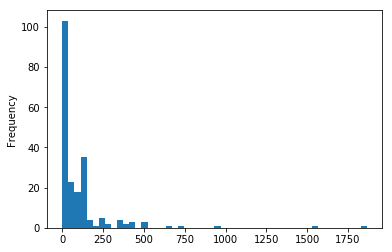

In [277]:
df_descritivo['length'].plot(kind='hist', bins=50)

Algumas estatísticas descritivas do comprimentos das mensagens de andamentos

In [278]:
df_descritivo['length'].describe() 

count     208.000000
mean      101.567308
std       209.778156
min         0.000000
25%         0.000000
50%        40.500000
75%       120.000000
max      1864.000000
Name: length, dtype: float64

Análise da mensagem com maior numero de termos

In [279]:
df_descritivo.sort_values(['length'],ascending=False)[1:100]

,tags,messages,length
51,Decisão Proferida,Vistos. A título de honorários advocatícios d...,1555
77,Remetido ao DJE,Relação: 0329/2013 Teor do ato: Diante do expo...,969
164,Decisão Proferida,Controle nº 33/2017Vistos.1 - Recebo a denúnc...,712
79,Julgada Improcedente a Ação - Sentença Completa,"Diante do exposto, JULGO IMPROCEDENTE a prete...",660
152,Remetido ao DJE,Relação: 0185/2017 Teor do ato: Controle nº 33...,506
6,Remetido ao DJE,Relação: 0323/2017 Teor do ato: Vistos.Em face...,495
70,Remetido ao DJE,Relação: 0270/2014 Teor do ato: Vistos. Recebo...,495
33,Remetido ao DJE,Relação: 0264/2016 Teor do ato: Vistos.Expeça-...,430
154,Despacho,Controle nº 33/2017.Vistos.Resposta à acusaçã...,426
58,Remetido ao DJE,Relação: 0396/2015 Teor do ato: Vistos. CUMPRA...,417


In [280]:
#Tags
print(df_descritivo[df_descritivo['length'] == 15115]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 14912]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 12222]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 12086]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11617]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11458]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11408]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11270]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11089]['tags'].iloc[0])
print(df_descritivo[df_descritivo['length'] == 11051]['tags'].iloc[0])
#Mensagens
df_descritivo[df_descritivo['length'] == 15115]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 14912]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 12222]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 12086]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 11617]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 11408]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 11270]['messages'].iloc[0]
#df_descritivo[df_descritivo['length'] == 11089]['messages'].iloc[0]

IndexError: single positional indexer is out-of-bounds

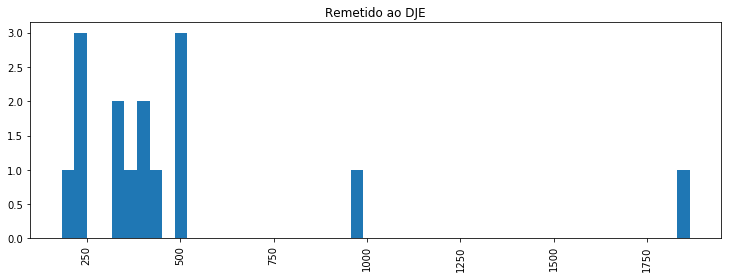

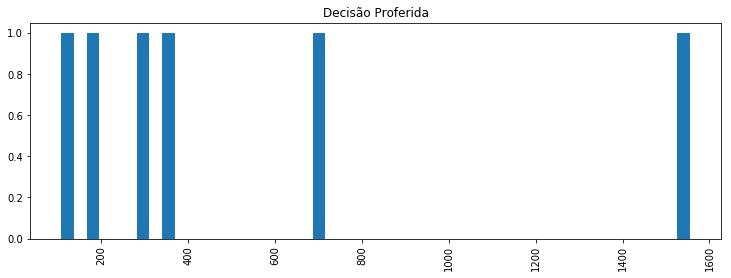

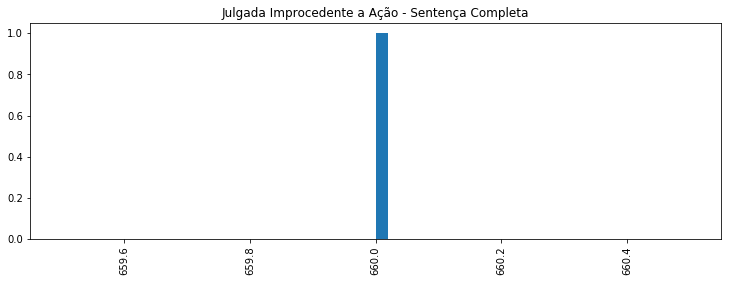

In [281]:
#df_descritivo.hist(column='length', by='tags', bins=10,figsize=(12,4))
#Remetido ao DJE
remetido_dje = df_descritivo[df_descritivo['tags'] == 'Remetido ao DJE']
remetido_dje.hist(column='length', by='tags', bins=50,figsize=(12,4))
#Decisao Proferida
decisao_proferida = df_descritivo[df_descritivo['tags'] == 'Decisão Proferida']
decisao_proferida.hist(column='length', by='tags', bins=50,figsize=(12,4))
#Julgada Improcedente a Ação - Sentença Completa
julgada_improcedente = df_descritivo[df_descritivo['tags'] == 'Julgada Improcedente a Ação - Sentença Completa']
julgada_improcedente.hist(column='length', by='tags', bins=50,figsize=(12,4))

# Preprocessamento de texto

In [282]:
# from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords

Lista de stopwords

In [283]:
sw = stopwords.words('portuguese') # Cuidado o NÃO é uma stopword
df_sw = pd.DataFrame(sw, columns=['stopwords'])

Função de qualificação do texto

In [284]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]

Dados originais

In [285]:
print(len(df_descritivo))
df_descritivo.head()

208


,tags,messages,length
0,Certidão de Publicação Expedida,Relação :0359/2017 Data da Disponibilização: 2...,125
1,Remetido ao DJE,Relação: 0359/2017 Teor do ato: Fica a parte r...,239
2,Ato Ordinatório Praticado,"Fica a parte requerida intimada para retirar,...",97
3,Recebidos os Autos da Conclusão,mandado de levantamento assinado e disponível ...,73
4,Certidão de Publicação Expedida,Relação :0323/2017 Data da Disponibilização: 0...,125


Mensagens "tokenized" (lista de tokens ou palavras)

In [286]:
df_descritivo['messages'].head(5).apply(text_process)

0    [Relação, 03592017, Data, Disponibilização, 20...
1    [Relação, 03592017, Teor, ato, Fica, parte, re...
2    [Fica, parte, requerida, intimada, retirar, ci...
3    [mandado, levantamento, assinado, disponível, ...
4    [Relação, 03232017, Data, Disponibilização, 04...
Name: messages, dtype: object

Observe que o dataframe original não foi alterado

In [287]:
df_descritivo.head()

,tags,messages,length
0,Certidão de Publicação Expedida,Relação :0359/2017 Data da Disponibilização: 2...,125
1,Remetido ao DJE,Relação: 0359/2017 Teor do ato: Fica a parte r...,239
2,Ato Ordinatório Praticado,"Fica a parte requerida intimada para retirar,...",97
3,Recebidos os Autos da Conclusão,mandado de levantamento assinado e disponível ...,73
4,Certidão de Publicação Expedida,Relação :0323/2017 Data da Disponibilização: 0...,125


## Vectorization

1 - Contagem da ocorrência dos termos

2 - Pesos dos termos

3 - Normalização do vetor para comprimento unitário

In [288]:
from sklearn.feature_extraction.text import CountVectorizer

Bag de palavras (bow)

In [289]:
bow = CountVectorizer(analyzer=text_process).fit(df_descritivo['messages'])

Quantidade de termos no dicionário

In [290]:
print(len(bow.vocabulary_)) #Numero de termos no vocabulario

697


In [291]:
bow.vocabulary_

{'00362013': 0,
 '00362017': 1,
 '01052016': 2,
 '01492016': 3,
 '01722017': 4,
 '01852017': 5,
 '02642016': 6,
 '02702014': 7,
 '03012017': 8,
 '03042017': 9,
 '03232017': 10,
 '03292013': 11,
 '03592017': 12,
 '03962015': 13,
 '04022013': 14,
 '04092017': 15,
 '04102016': 16,
 '05': 17,
 '05032016': 18,
 '05092017': 19,
 '05102016': 20,
 '06062016': 21,
 '06092017': 22,
 '07042016': 23,
 '07042017': 24,
 '07062016': 25,
 '07062017': 26,
 '08022017': 27,
 '08042016': 28,
 '08062017': 29,
 '09022017': 30,
 '09082017': 31,
 '09737892720128260506': 32,
 '1': 33,
 '10': 34,
 '100000': 35,
 '10dez': 36,
 '11': 37,
 '11032016': 38,
 '11092017': 39,
 '114118': 40,
 '123128': 41,
 '126129': 42,
 '1376': 43,
 '14032016': 44,
 '14072014': 45,
 '14112013': 46,
 '142': 47,
 '1439': 48,
 '147148': 49,
 '15': 50,
 '15072013': 51,
 '15072014': 52,
 '152157': 53,
 '1533': 54,
 '1541': 55,
 '154155': 56,
 '15861587': 57,
 '16082017': 58,
 '161164': 59,
 '1612': 60,
 '1616': 61,
 '1627': 62,
 '1630': 6

Selecione alguma mensagem específica

In [292]:
m1 = df_descritivo[df_descritivo['length'] == 11617]['messages']
#m1 = df_descritivo['messages'][0]
print(m1.all())

True


Veja a bag of words da mensagem

In [293]:
bow1 = bow.transform([m1])
print(bow1)
print(bow1.shape)


(1, 697)


Selecione a palavra de maior frequencia

In [294]:
print(bow.get_feature_names()[35934])

IndexError: list index out of range

In [295]:
termos = bow.get_feature_names()
df_termos = pd.DataFrame(termos,columns=['termos'])
df_termos[df_termos['termos'].str.contains('valor')]

,termos
683,valor
684,valores


Transforme a bow em um DataFrame completo de mensagens

In [300]:
df_bow = bow.transform(df_descritivo['messages'])

In [308]:
type(df_bow)

scipy.sparse.csr.csr_matrix

Matriz de Termos

In [297]:
print('Shape of Sparse Matrix: ', df_bow.shape)
print('Amount of Non-Zero occurences: ', df_bow.nnz)

Shape of Sparse Matrix:  (208, 697)
Amount of Non-Zero occurences:  2027


In [298]:
sparsity = (100.0 * df_bow.nnz / (df_bow.shape[0] * df_bow.shape[1]))
#print('sparsity: {}'.format(round(sparsity)))
print('sparsity (%): {}'.format(sparsity))

sparsity (%): 1.3981624544752236


In [299]:
100*(437080 / (23507*36367))

0.05112769932609029

Peso e Normalização com TF-IDF

In [185]:
from sklearn.feature_extraction.text import TfidfTransformer

In [186]:
tfidf = TfidfTransformer().fit(df_bow)

Pesos dos termos em uma mensagem, usando TF-IDF 

In [188]:
tfidf1 = tfidf.transform(bow1)
print(bow.get_feature_names()[35934])

print('\n')
print(tfidf1)


valor


  (0, 36344)	0.0407484838234
  (0, 36335)	0.0683697524143
  (0, 36302)	0.125781363256
  (0, 36298)	0.0259860237813
  (0, 36227)	0.0839064662843
  (0, 36200)	0.0320613525513
  (0, 36199)	0.0594221891235
  (0, 36161)	0.0304677086388
  (0, 36150)	0.033793411827
  (0, 36148)	0.0351682246179
  (0, 36144)	0.0328179666284
  (0, 36143)	0.0351682246179
  (0, 36130)	0.0234169346702
  (0, 36128)	0.0322468154093
  (0, 36118)	0.0251844990404
  (0, 36115)	0.0281174506493
  (0, 36114)	0.0486449318747
  (0, 36110)	0.0328179666284
  (0, 36092)	0.0351682246179
  (0, 36086)	0.0293879258065
  (0, 36071)	0.132356183028
  (0, 36053)	0.0210402897339
  (0, 36052)	0.0259860237813
  (0, 36017)	0.0262199582933
  (0, 36011)	0.021642754287
  :	:
  (0, 12528)	0.0320613525513
  (0, 11844)	0.0351682246179
  (0, 11822)	0.0571404325657
  (0, 11114)	0.0246874098274
  (0, 10947)	0.0228342410509
  (0, 10502)	0.0230175670779
  (0, 10348)	0.0309204742724
  (0, 10344)	0.0328179666284
  (0, 10341)	0.0351682246179
  (0

Verificar apenas a IDF de algumas palavras...

In [189]:
tfidf.idf_[bow.vocabulary_['valor']]


4.104748338631234

Transforma todas as mensagens do dataframe bow em mensagens do dataframe tfidf

In [191]:
df_tfidf = tfidf.transform(df_bow)

In [192]:
df_tfidf = tfidf.transform(df_bow)
print(df_tfidf.shape)
print('\n')
print(df_tfidf)

(23507, 36367)


  (0, 20832)	0.126570778906
  (0, 20255)	0.158045682935
  (0, 20217)	0.149518074184
  (0, 19244)	0.135377371712
  (0, 15082)	0.156910185098
  (0, 15059)	0.158022221457
  (0, 14817)	0.260842279419
  (0, 7548)	0.399982595363
  (0, 6492)	0.366279721336
  (0, 6065)	0.337454217827
  (0, 4773)	0.436559351453
  (0, 1332)	0.449535162177
  (1, 34640)	0.220353635763
  (1, 34407)	0.162196609532
  (1, 32466)	0.123701568779
  (1, 30591)	0.198937911804
  (1, 28799)	0.208416309186
  (1, 27489)	0.103306271779
  (1, 25503)	0.151391733348
  (1, 24735)	0.107176257078
  (1, 23520)	0.261586975653
  (1, 22405)	0.254187683305
  (1, 21797)	0.109500564328
  (1, 21308)	0.205502451512
  (1, 20832)	0.0878365117975
  :	:
  (23505, 22143)	0.199367252056
  (23505, 20937)	0.139473411765
  (23505, 20726)	0.129139007097
  (23505, 20107)	0.147383781335
  (23505, 19387)	0.14782417305
  (23505, 18410)	0.219182018743
  (23505, 17781)	0.168563001487
  (23505, 15478)	0.14782417305
  (23505, 14966)	0.14077754

In [193]:
df_descritivo.size

70521